In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
df_edge = pd.read_csv('twitch\FR\musae_FR_edges.csv')
df_target = pd.read_csv('twitch\FR\musae_FR_target.csv')

In [4]:
df_target = df_target[df_target.partner.eq(True)]

In [5]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [6]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  408
EDGES:  5792
DENSITY:  0.035
CLUSTERING:  0.1594474962719247


In [8]:
nx.clustering(graph)

{98: 0.11739130434782609,
 1616: 0.11699507389162561,
 4719: 0.19973009446693657,
 577: 0.176984126984127,
 586: 0.2276923076923077,
 2448: 0.18313725490196078,
 6148: 0.14114552893045004,
 1726: 0.06666666666666667,
 5388: 0.08333333333333333,
 1015: 0.11088709677419355,
 1939: 0.14444444444444443,
 5188: 0.25666666666666665,
 612: 0.09516172146484897,
 1440: 0.12792792792792793,
 421: 0.10606060606060606,
 4960: 0.16133004926108374,
 1548: 0.16996047430830039,
 5310: 0.08295454545454546,
 5708: 0.1568627450980392,
 4565: 0.12473572938689217,
 4211: 0.11997885835095137,
 4047: 0.17331560283687944,
 1261: 0.12,
 2496: 0.2134502923976608,
 539: 0.14055299539170507,
 4998: 0.08333333333333333,
 3920: 0.13296317942723554,
 142: 0.16466346153846154,
 2614: 0.1568627450980392,
 2161: 0.07337983144434758,
 1020: 0.07337909992372235,
 1314: 0.14102564102564102,
 4586: 0.10967741935483871,
 3931: 0.13004032258064516,
 5095: 0.09971509971509972,
 1183: 0.1862334032145353,
 4692: 0.25,
 761: 0.2

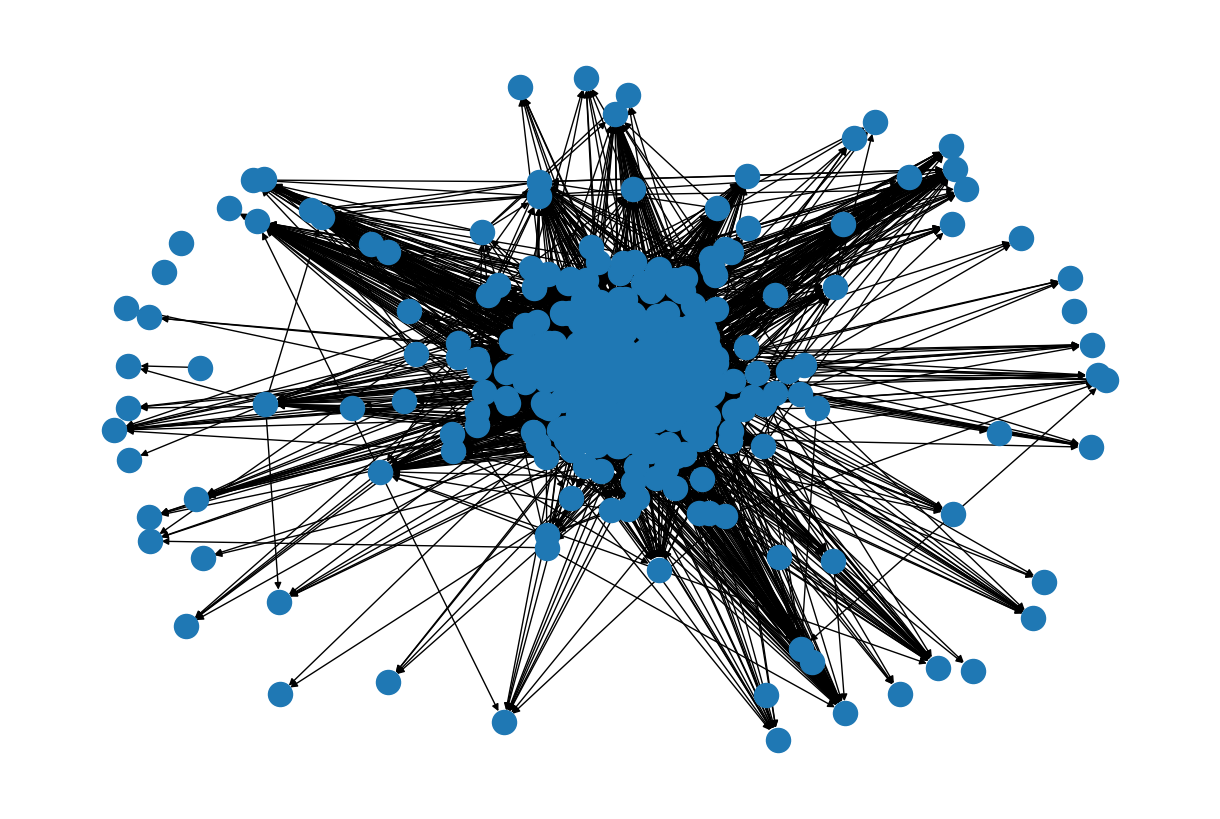

In [9]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

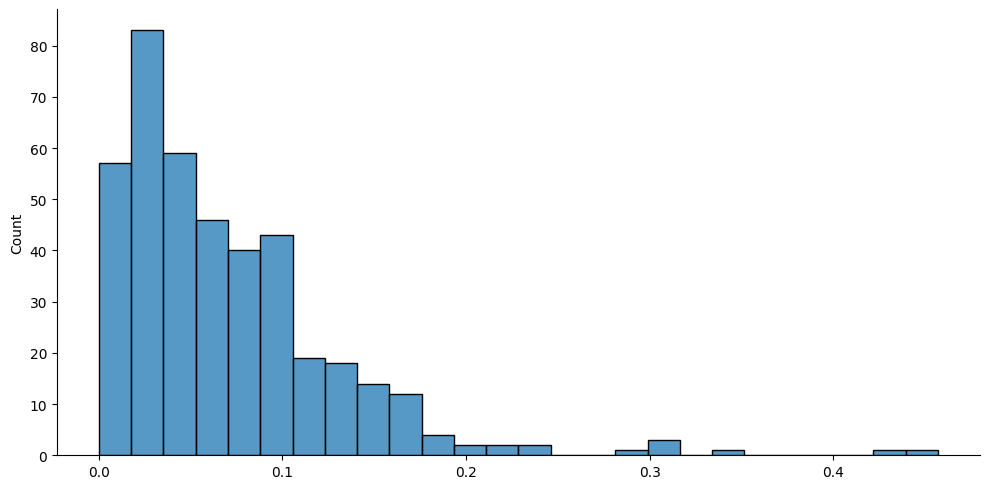

In [8]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

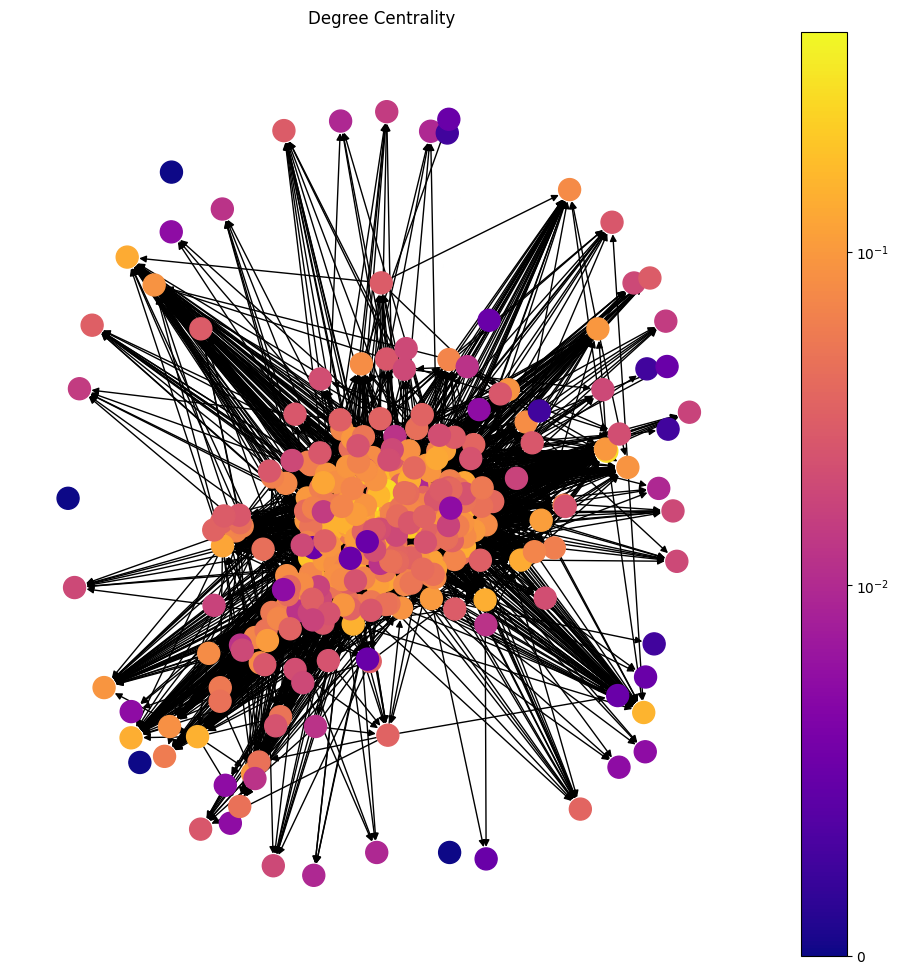

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

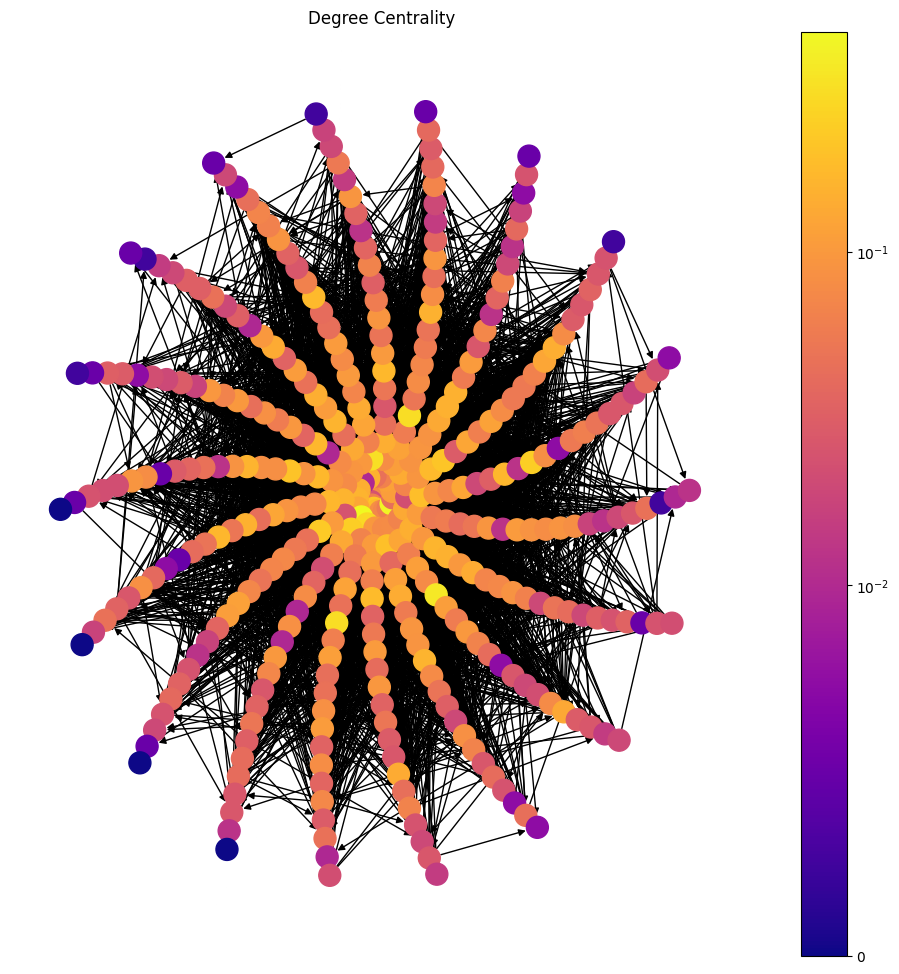

In [12]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{612: Text(-0.028589575969566957, 0.05144886258445515, '612'),
 5310: Text(-0.014133347026830894, 0.06826909198192502, '5310'),
 2161: Text(-0.009156446998855466, 0.032599534957172535, '2161'),
 1020: Text(-0.016720554776571344, 0.17555603502964695, '1020'),
 5968: Text(-0.555262526623224, -0.04673082488336133, '5968'),
 38: Text(-0.05242159680300414, 0.03299606854565419, '38'),
 2650: Text(0.022337395347159023, 0.06850270692903607, '2650'),
 3917: Text(0.1343401027596942, 0.05744736448911061, '3917'),
 5511: Text(-0.09718919407070202, -0.00832466982405202, '5511'),
 5543: Text(0.004379993909824768, 0.030290765073939314, '5543'),
 771: Text(0.06372742403690838, -0.06606592810896185, '771'),
 5208: Text(-0.06448619799662984, -0.028307758789273413, '5208'),
 6420: Text(0.03970959068997619, -0.09560100125531892, '6420')}

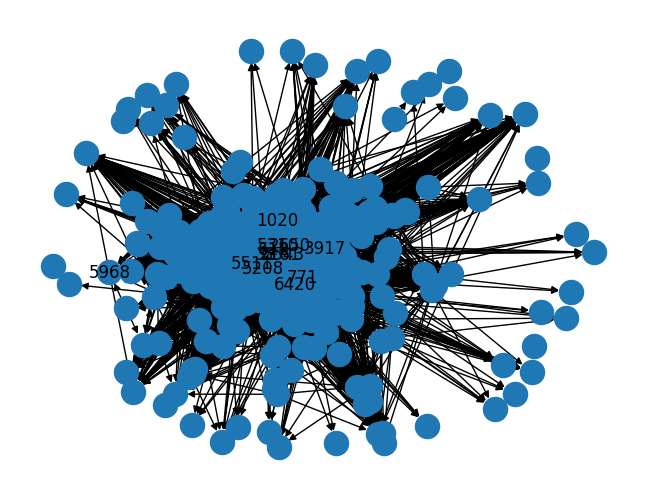

In [9]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

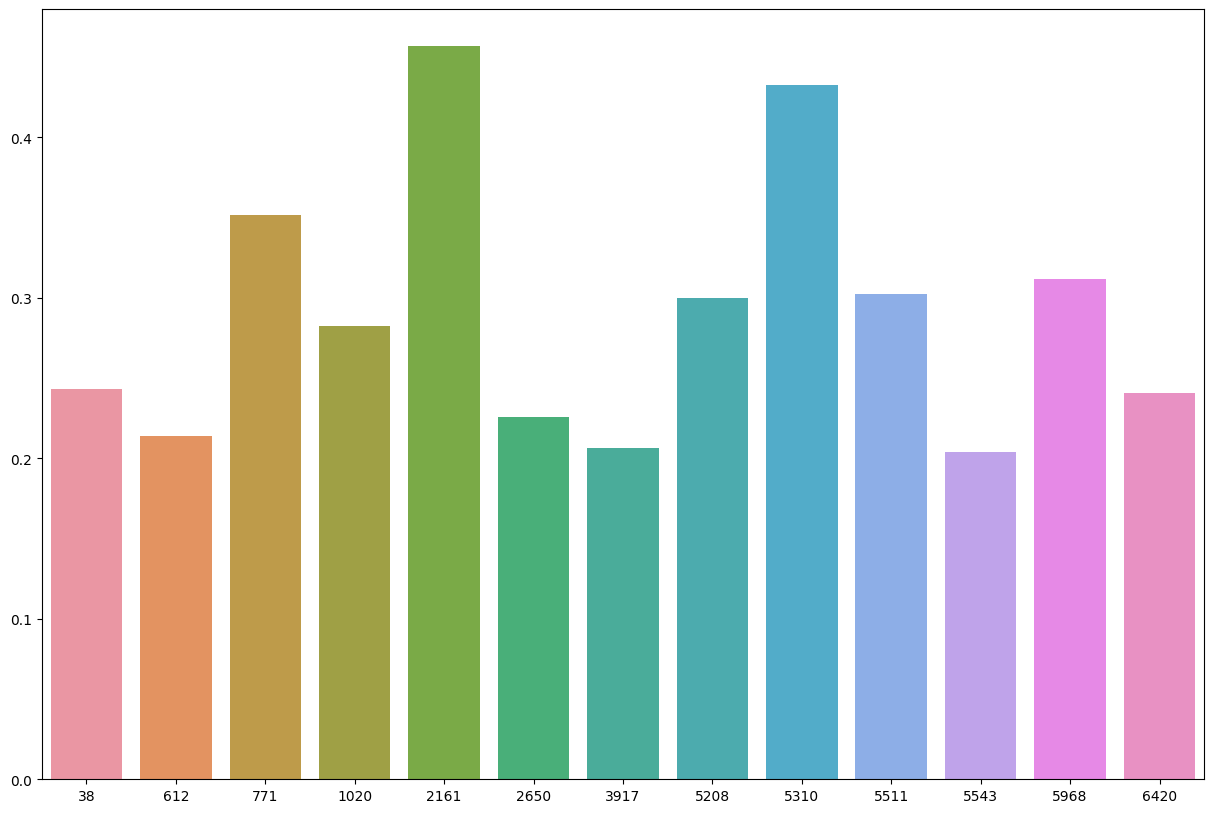

In [14]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

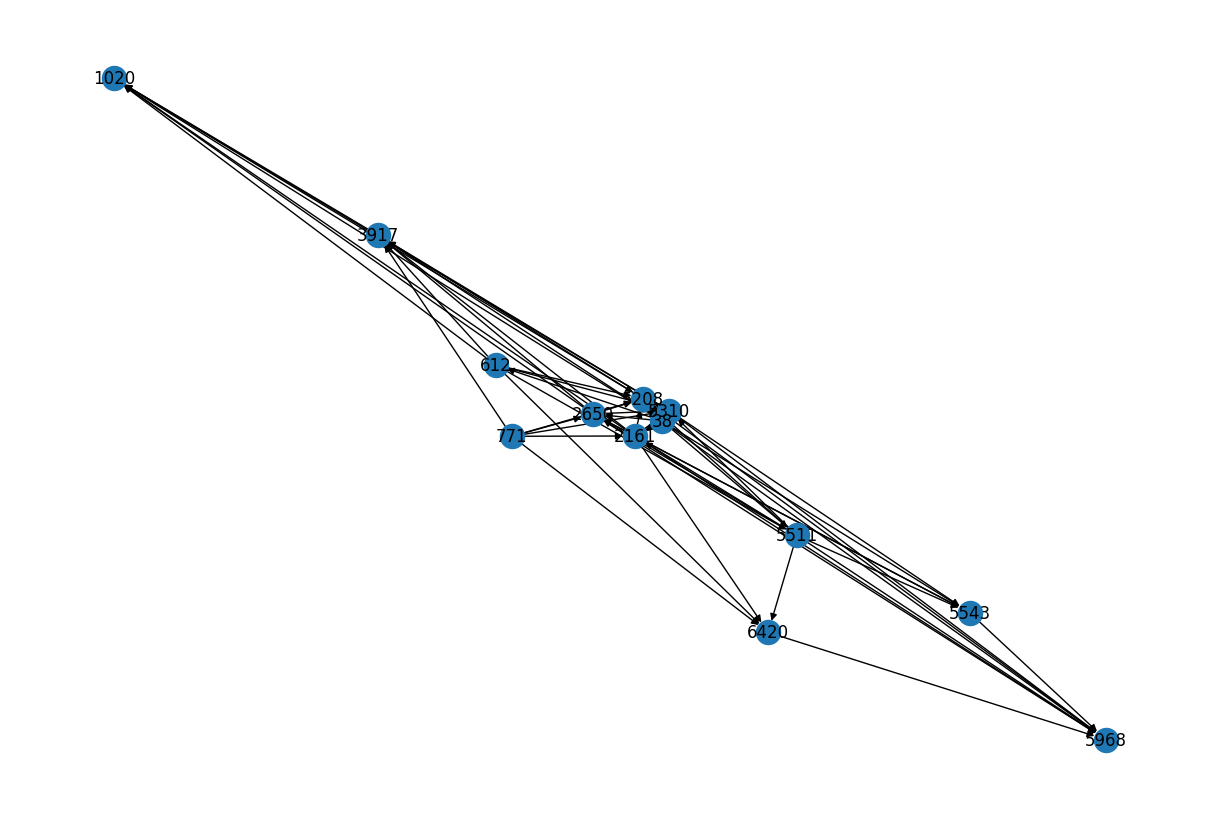

In [12]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

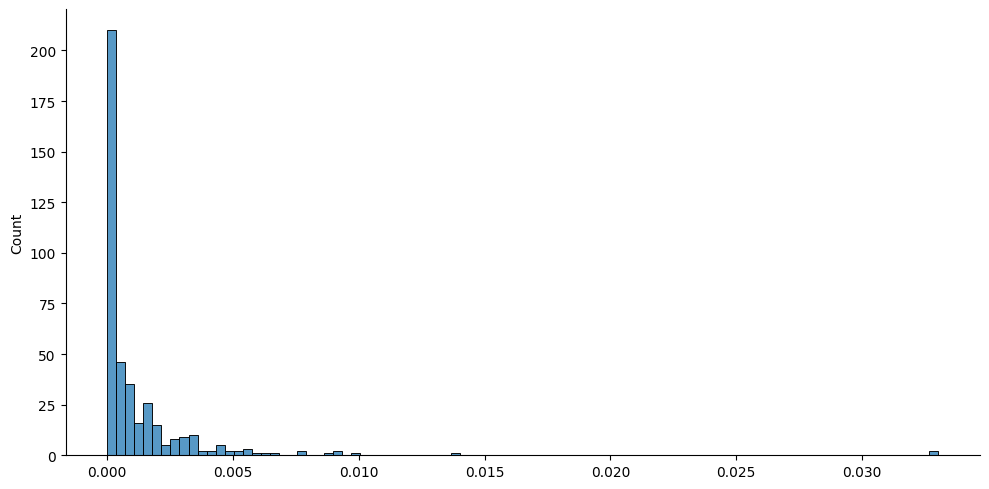

In [13]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

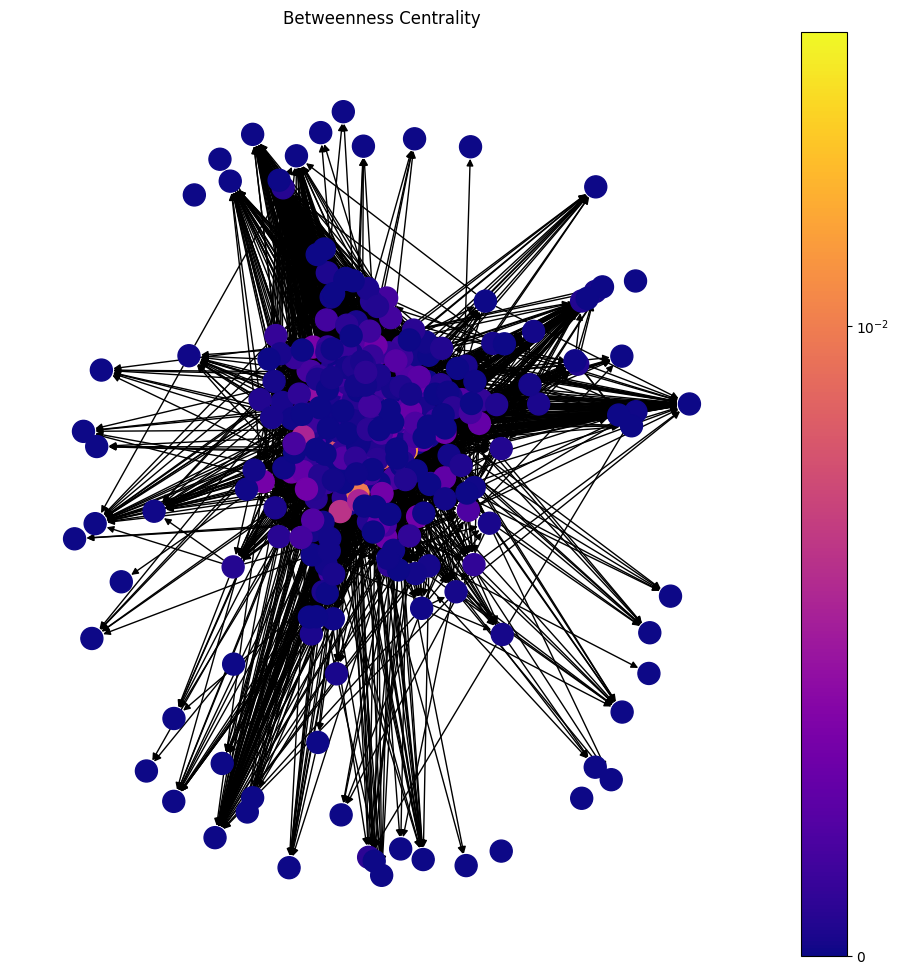

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

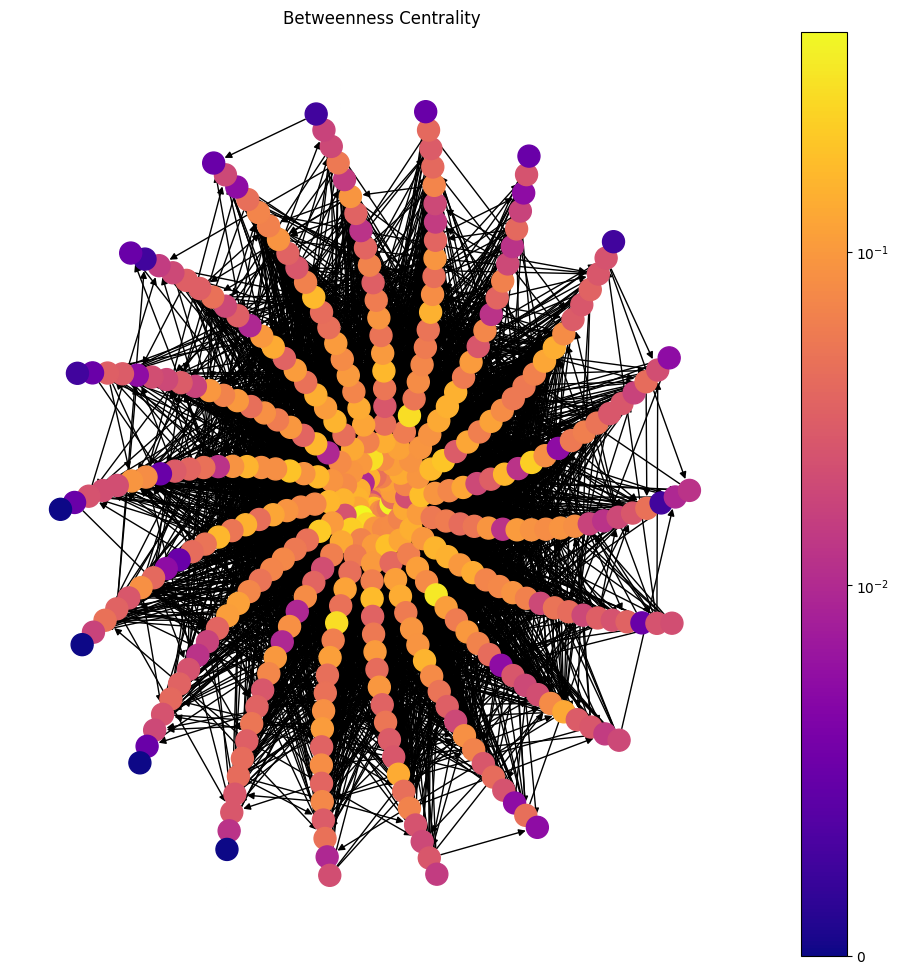

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{5310: Text(-0.06391526694867072, 3.9656106546248056e-05, '5310'),
 2161: Text(-0.016175388076370978, -0.023322079764078622, '2161'),
 2650: Text(-0.03616894060699314, 0.08548985071225798, '2650'),
 5511: Text(-0.0635620460432246, 0.01349306902058374, '5511'),
 771: Text(0.04565477733879328, -0.05233940493873859, '771'),
 2560: Text(0.05455649451953232, 0.040650404265153275, '2560'),
 6420: Text(0.03486731549244291, -0.14942602967173246, '6420')}

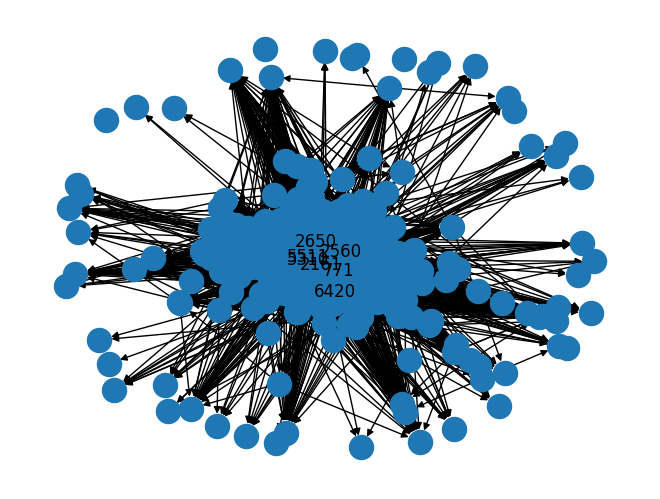

In [14]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

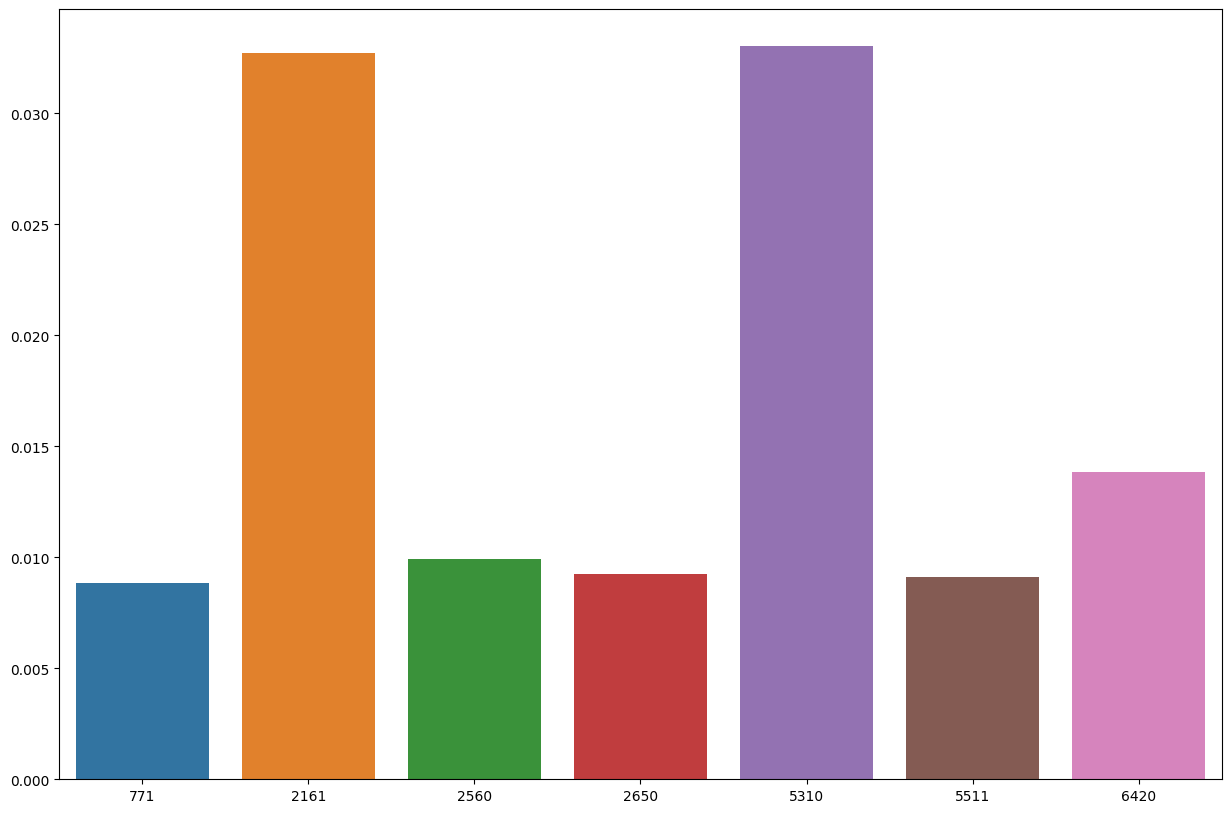

In [11]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

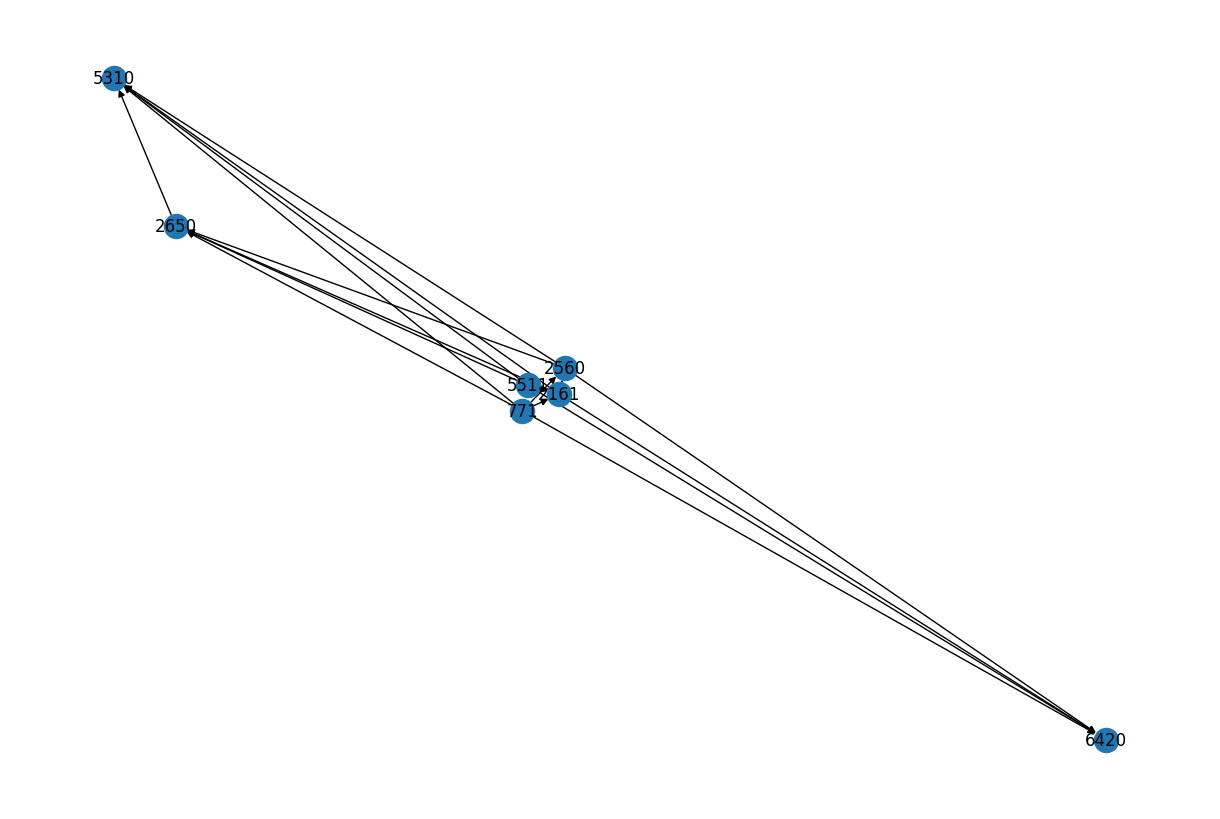

In [15]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

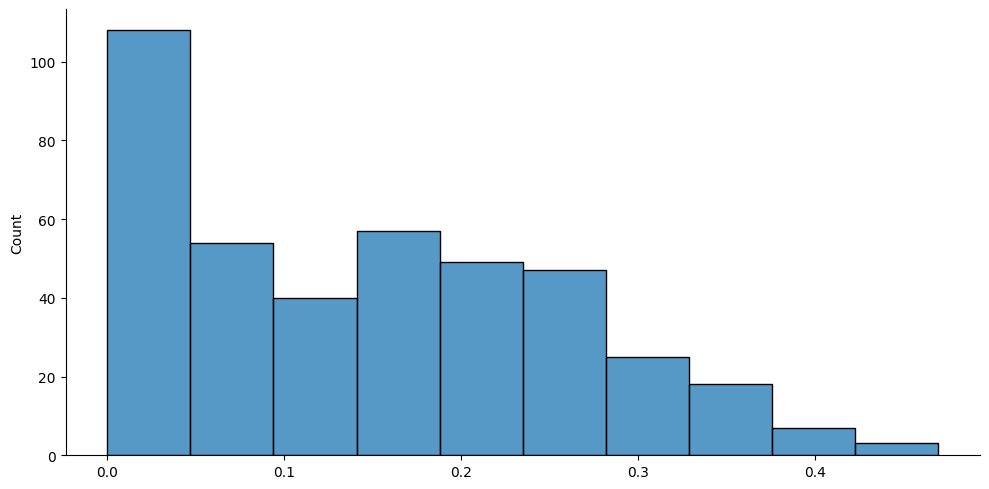

In [16]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

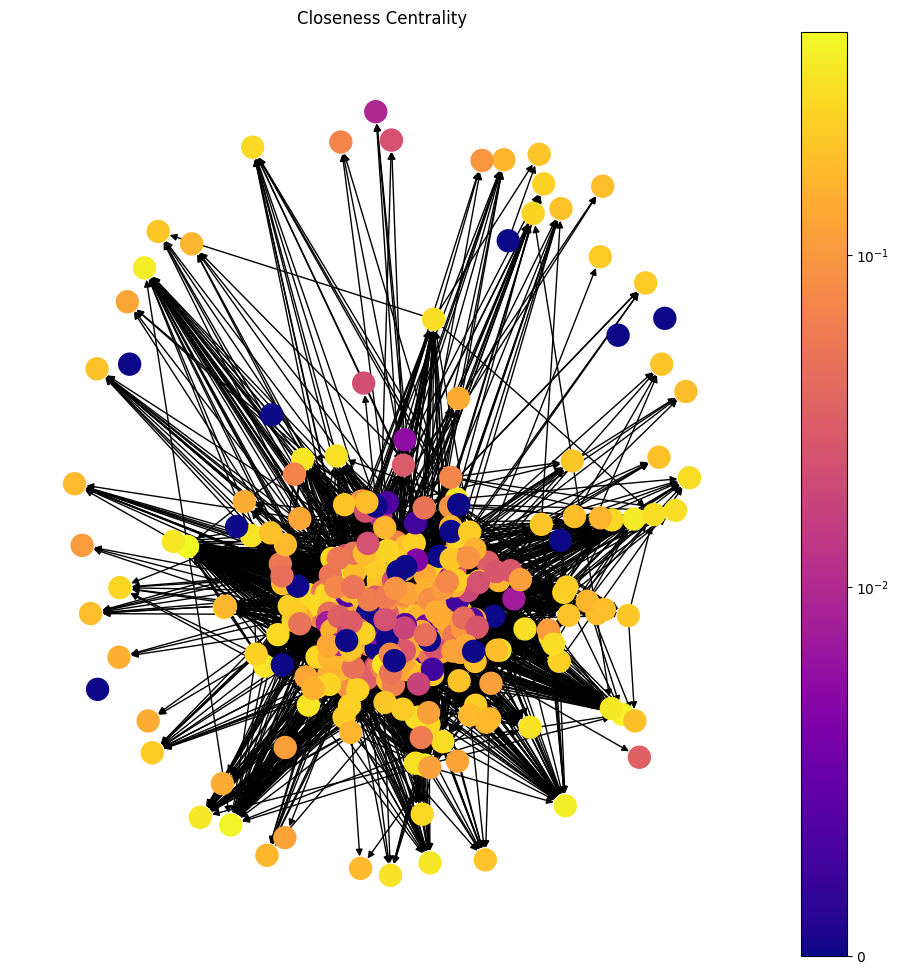

In [21]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

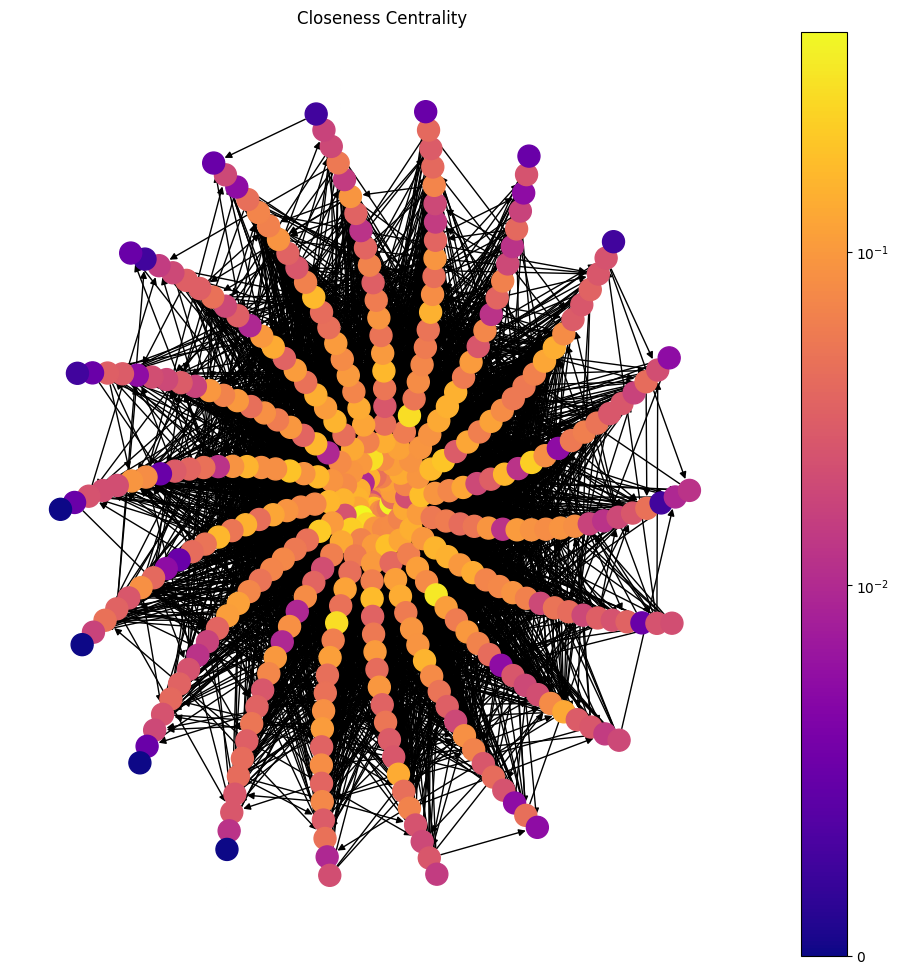

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1020: Text(0.12549795643030387, -0.14510389763301973, '1020'),
 5968: Text(0.4296062049971579, 0.12348209244599256, '5968'),
 6101: Text(0.6409217729152666, -0.803917839947343, '6101'),
 6488: Text(0.6432708653798063, -0.6359187469153568, '6488'),
 5208: Text(0.1085846318264693, 0.023182046387608783, '5208'),
 6374: Text(-0.29167240420405305, 0.9511432011493333, '6374')}

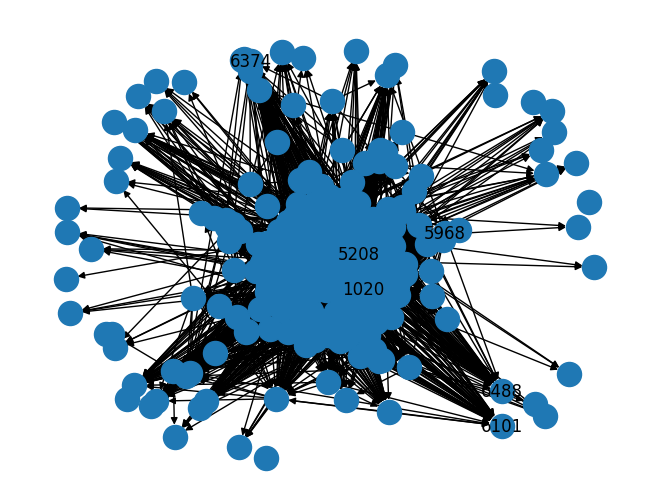

In [17]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

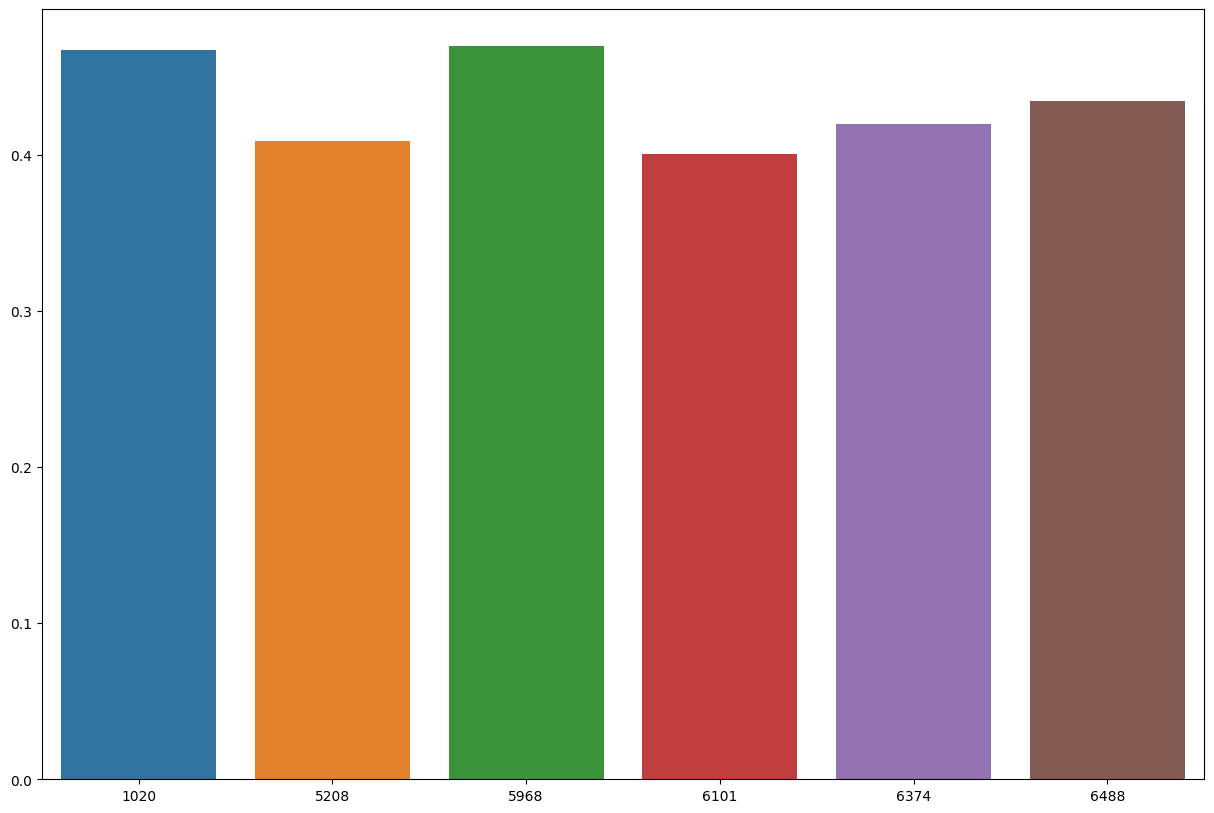

In [15]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

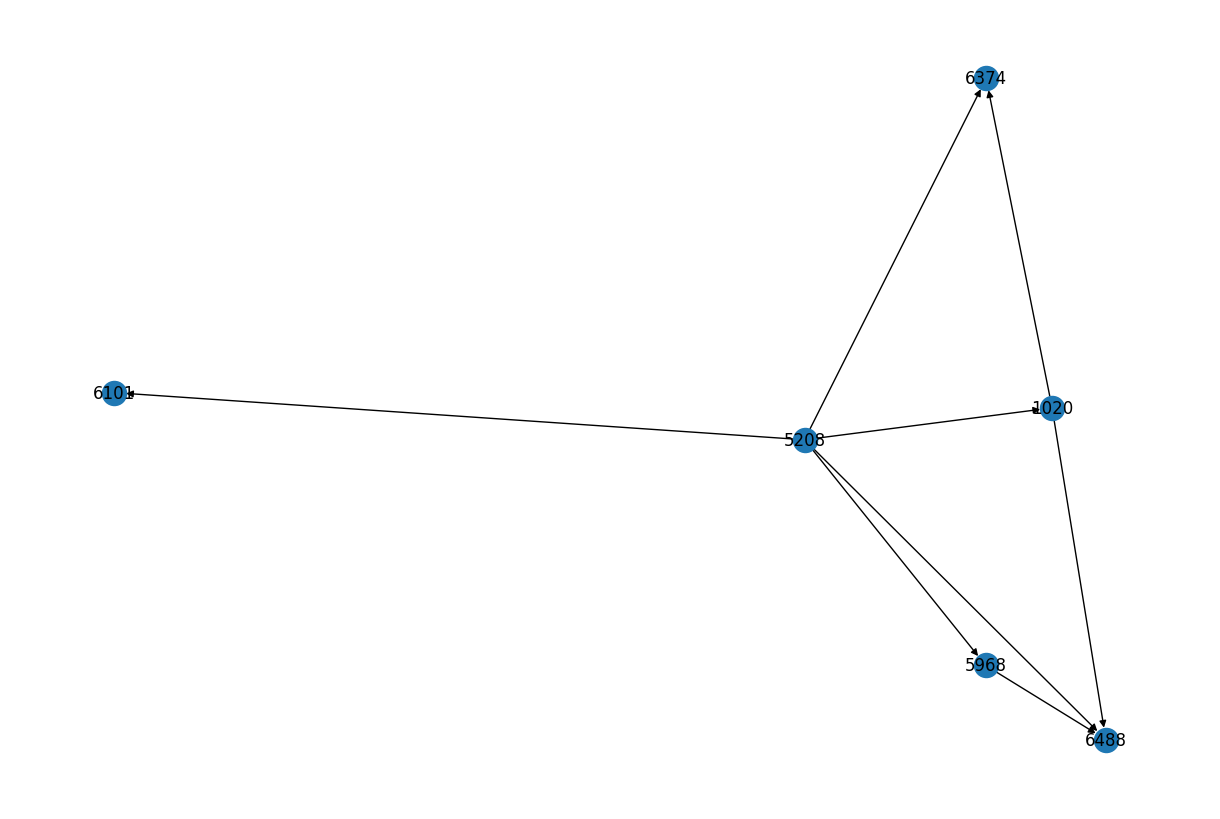

In [18]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_8840\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

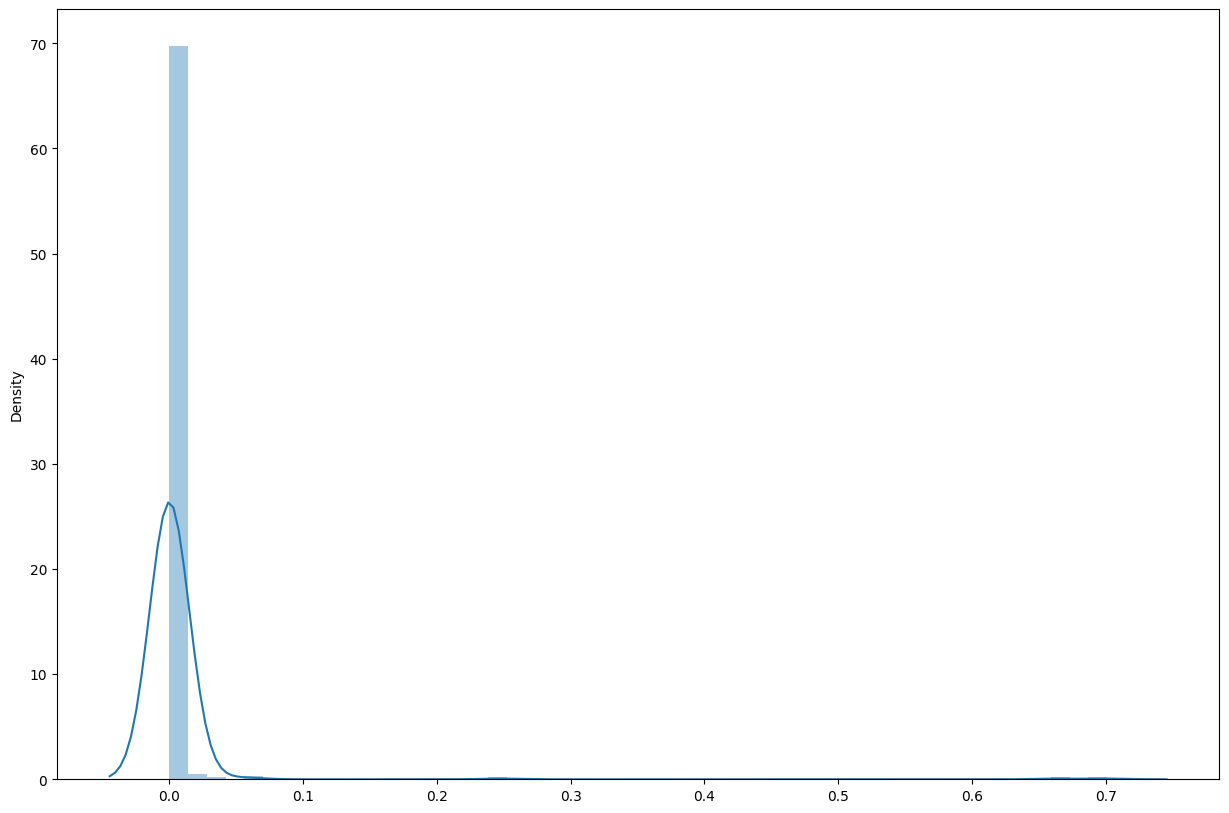

In [19]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

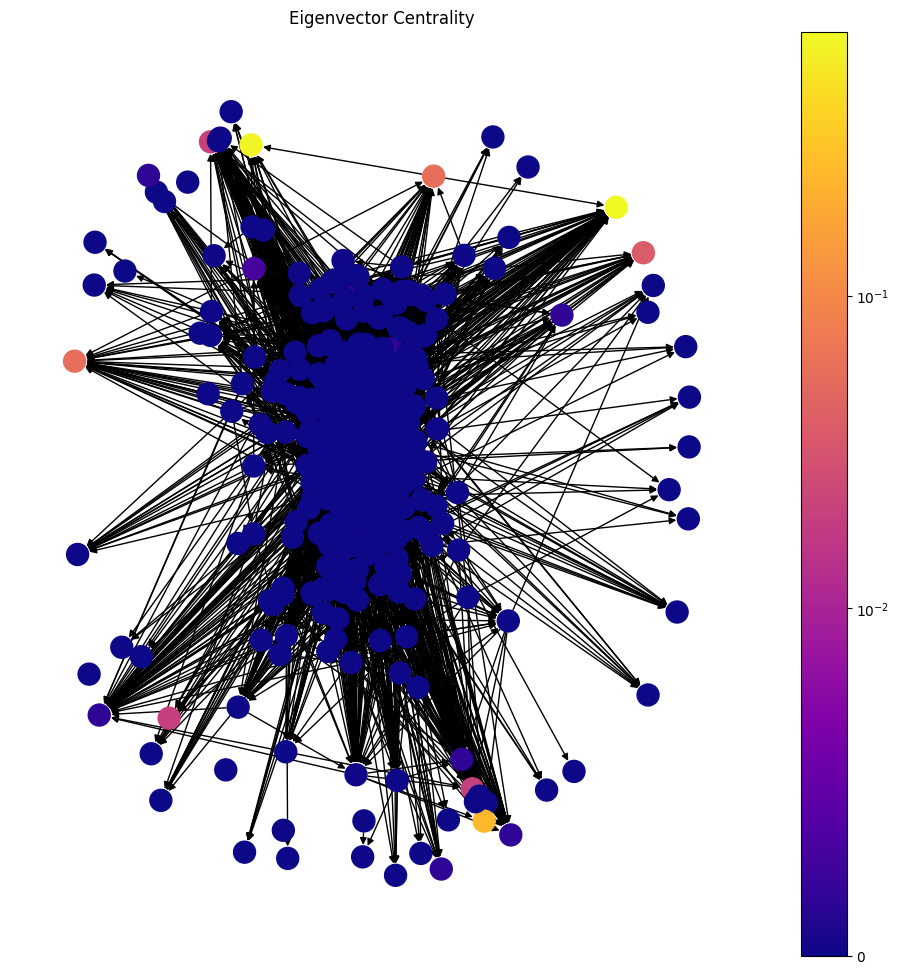

In [26]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

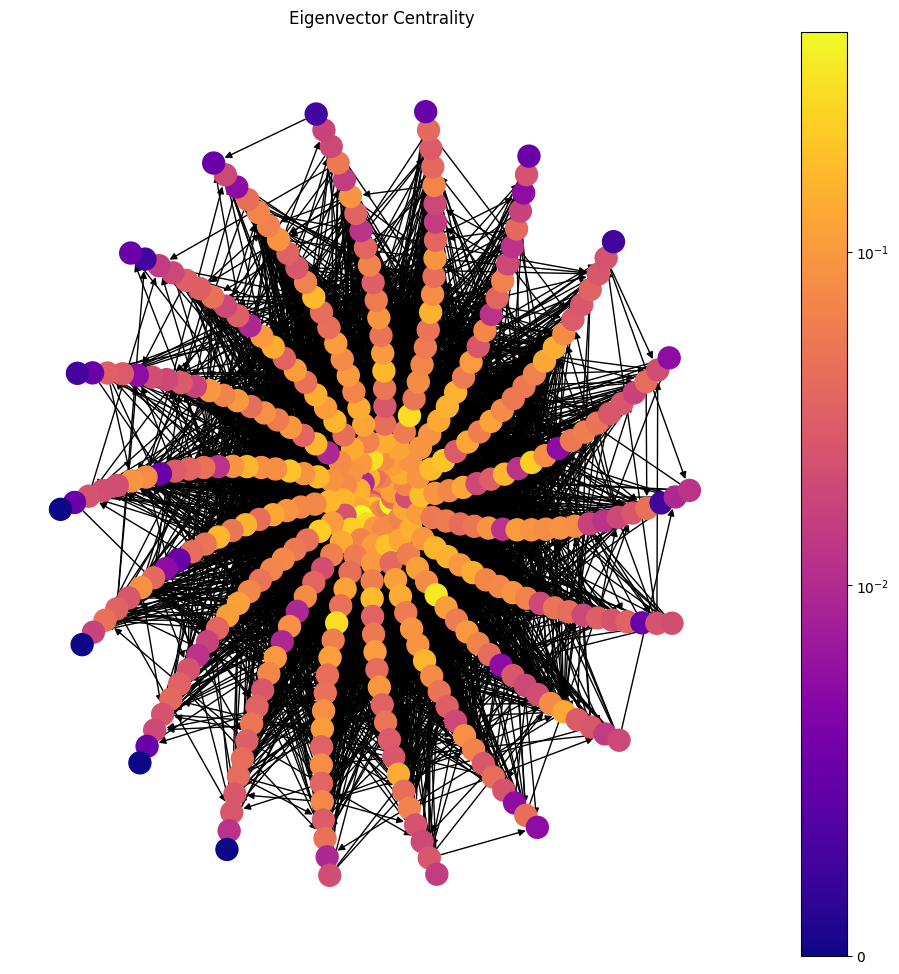

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{6354: Text(-0.015543746473359954, 0.7142957634055012, '6354'),
 6488: Text(0.6768962695532384, 0.3527228701802026, '6488'),
 3948: Text(0.6111617753444839, 0.01794753436265579, '3948'),
 6374: Text(0.7031544413673335, -0.023567857246361023, '6374'),
 6463: Text(-0.7075642331315194, 0.4917235392864904, '6463'),
 6427: Text(0.724855173708868, -0.30861781701445534, '6427'),
 6403: Text(-0.3303929867593258, -0.9591071345749583, '6403')}

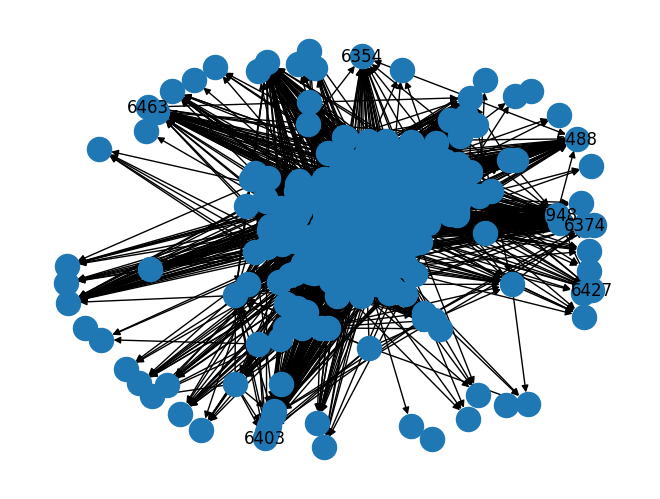

In [20]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

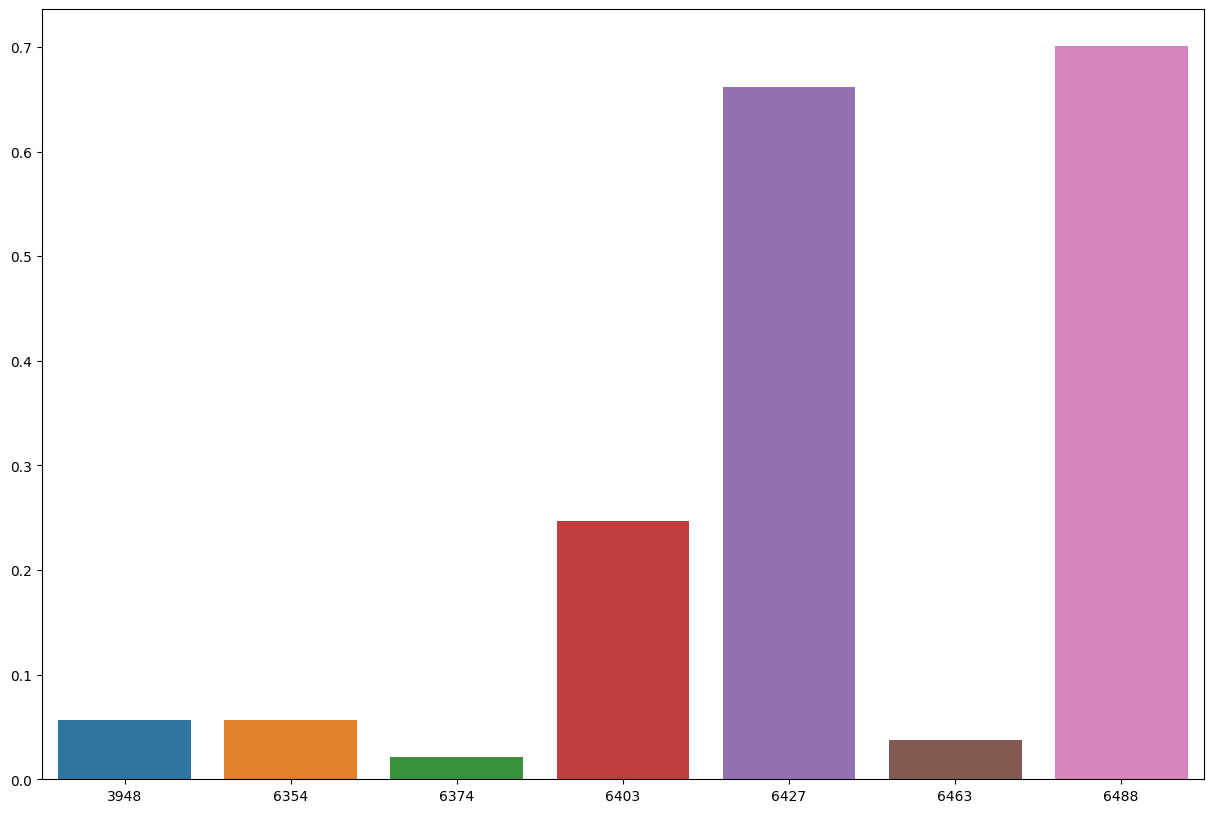

In [18]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

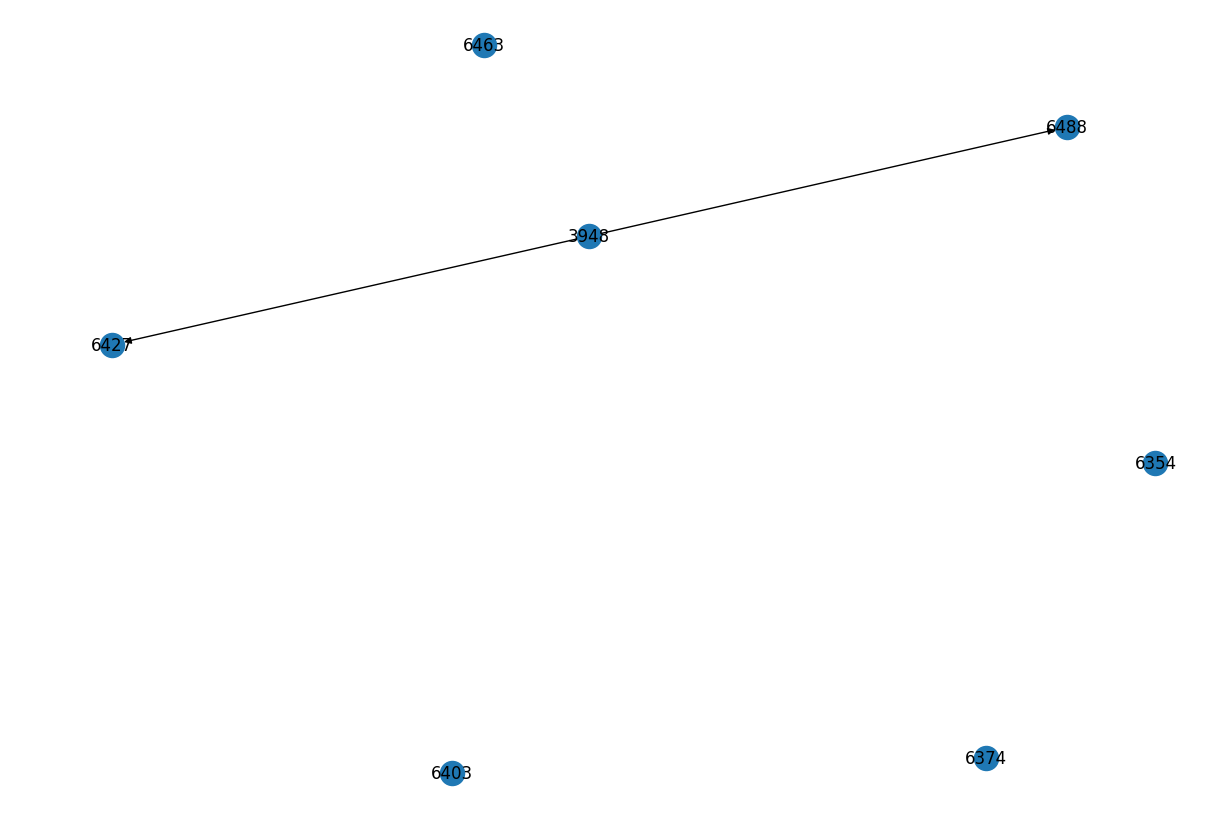

In [21]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

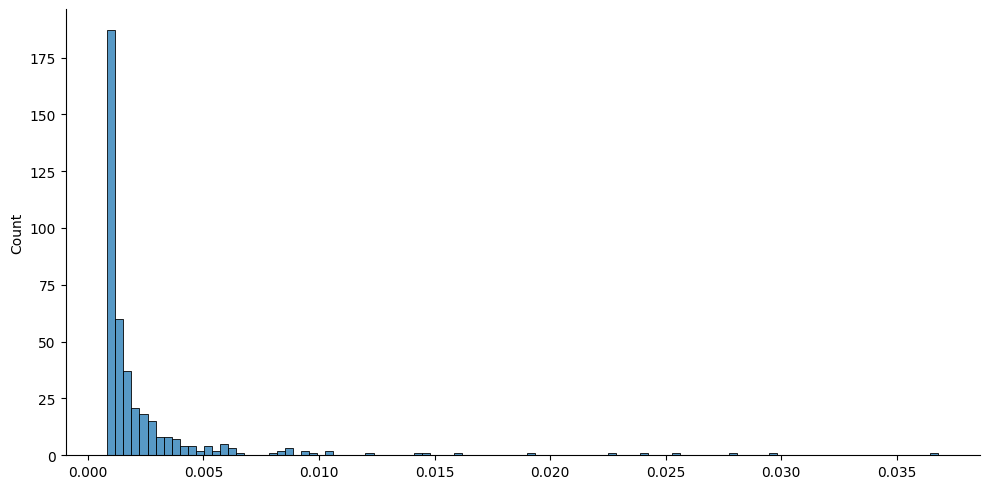

In [22]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

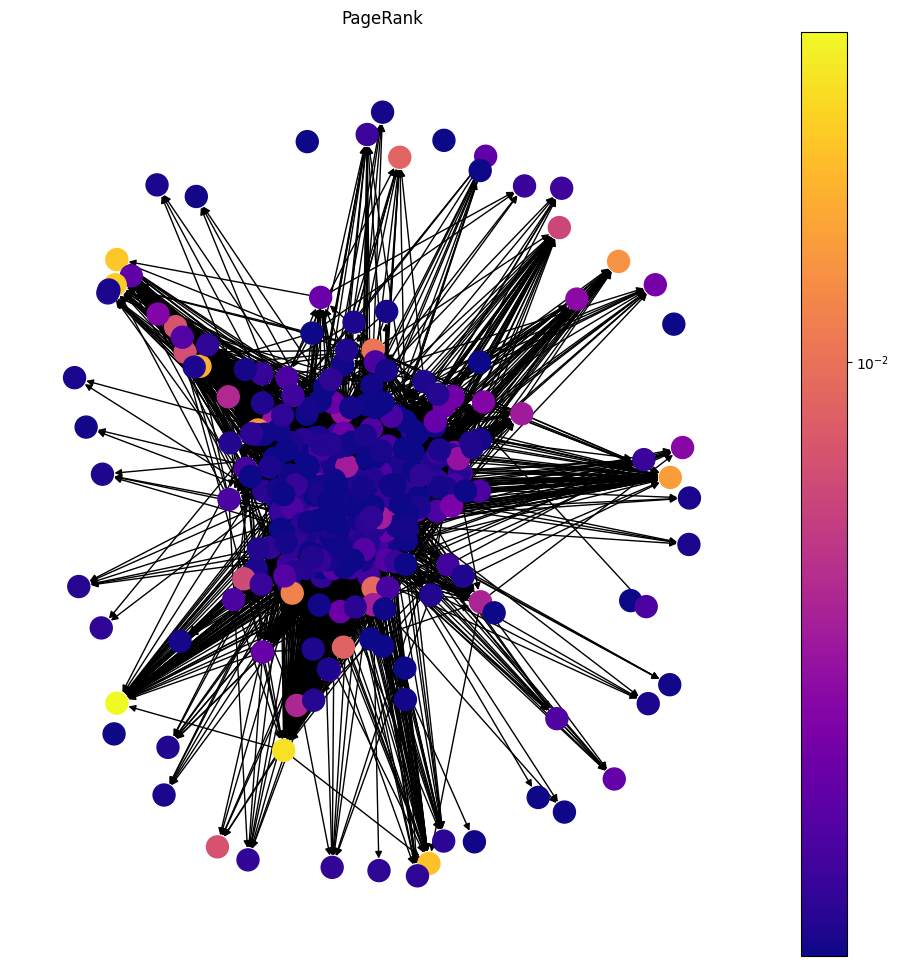

In [31]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

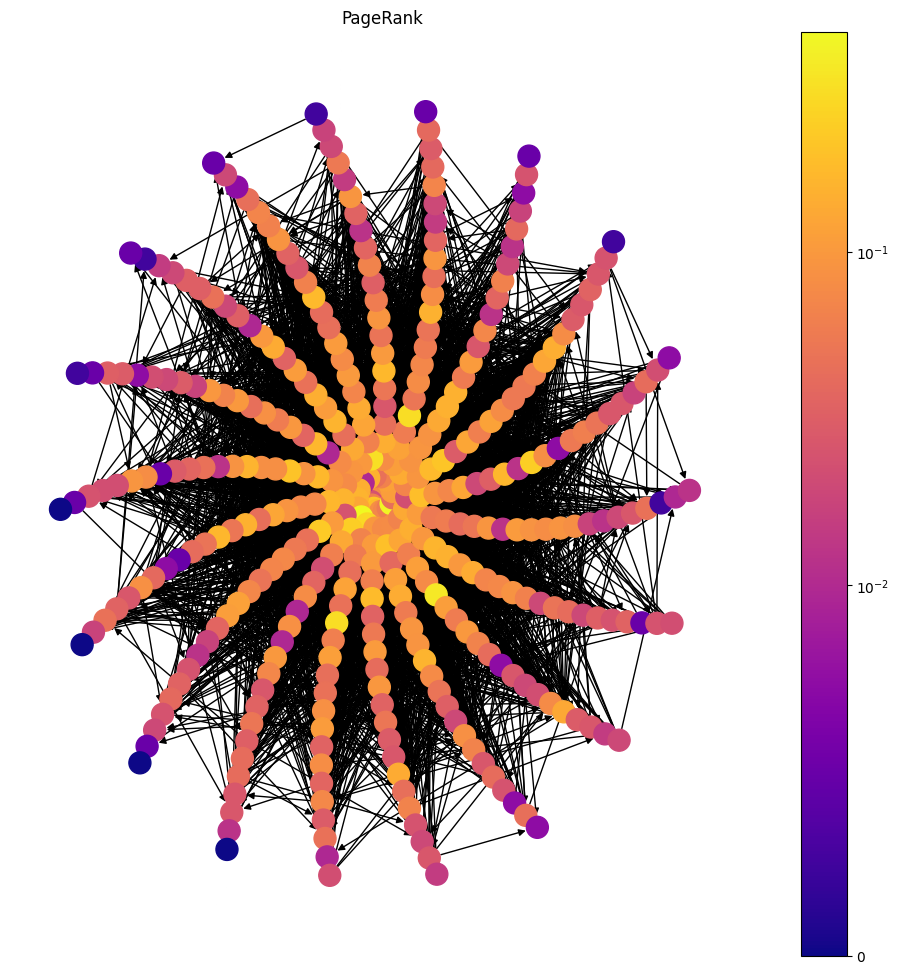

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{1020: Text(0.1069900687885577, -0.008276472956653118, '1020'),
 5968: Text(-0.14178340448456594, -0.25780285723694824, '5968'),
 6354: Text(-0.9400084542223422, -0.021804142109182325, '6354'),
 6488: Text(0.6569201942462114, -0.4914192920779996, '6488'),
 6374: Text(-0.12100205104638175, 0.7779008185596228, '6374'),
 6403: Text(-0.6325027481852425, 0.605187776582476, '6403')}

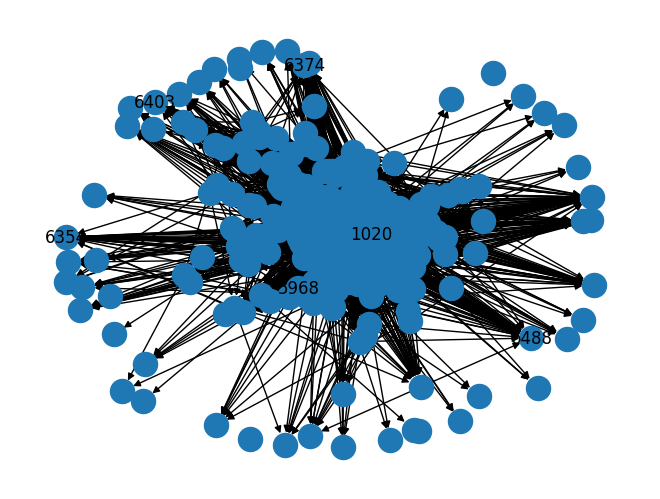

In [23]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

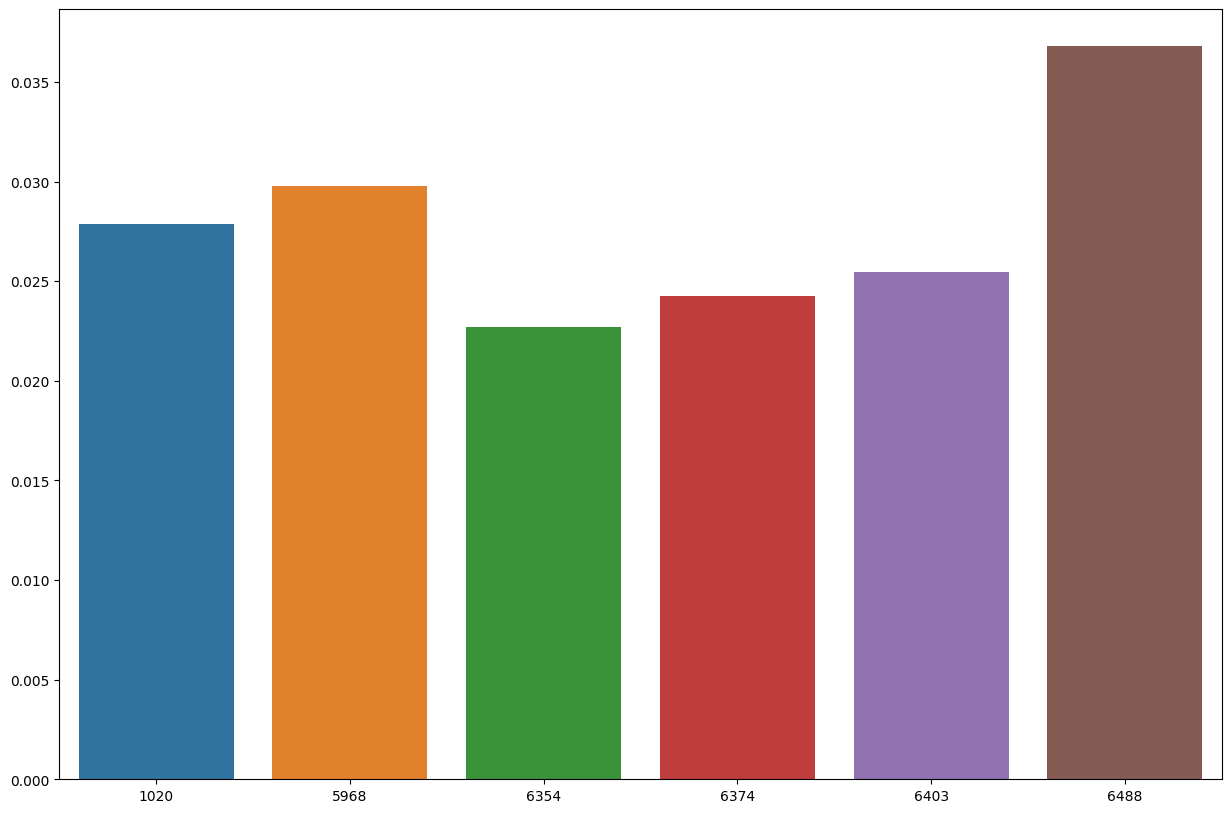

In [34]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

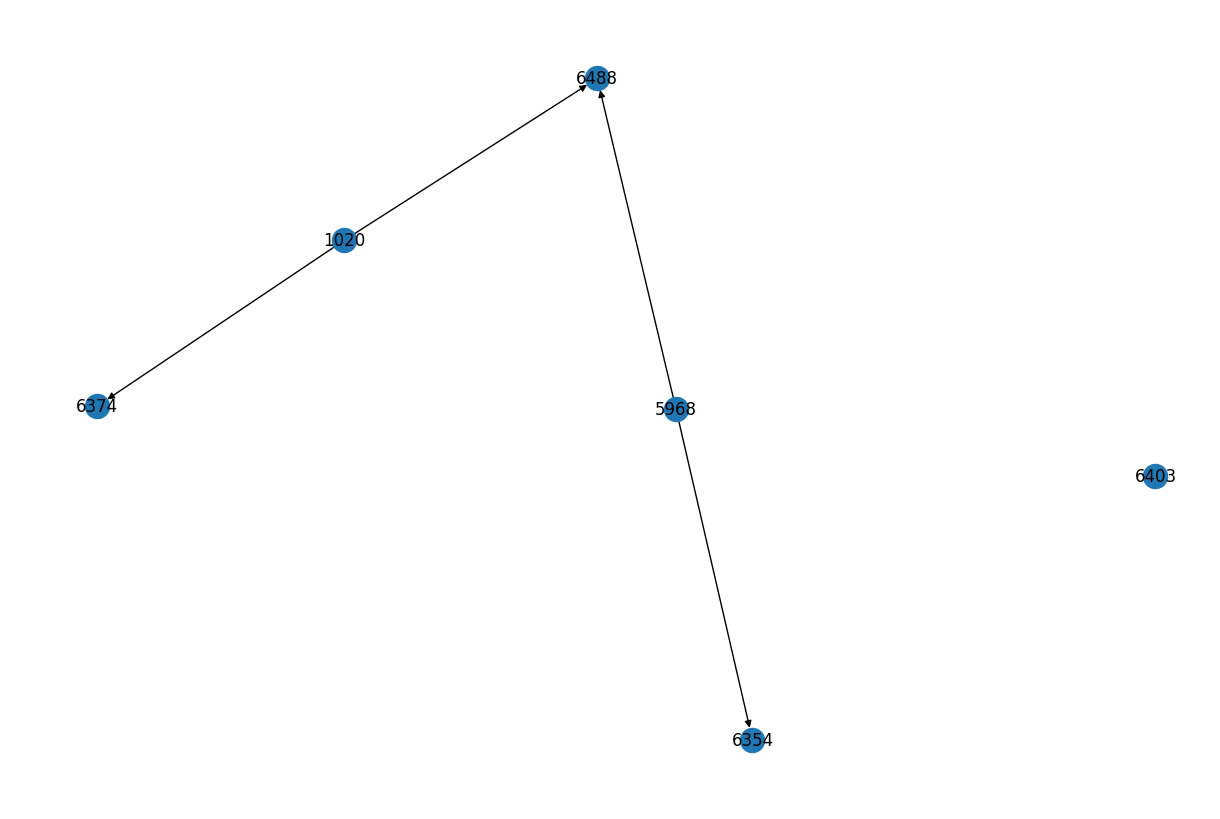

In [24]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [25]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({38,
            98,
            119,
            142,
            183,
            238,
            285,
            388,
            410,
            412,
            431,
            472,
            483,
            500,
            507,
            535,
            539,
            577,
            586,
            592,
            612,
            761,
            774,
            819,
            871,
            959,
            1015,
            1020,
            1050,
            1055,
            1058,
            1100,
            1115,
            1155,
            1156,
            1183,
            1240,
            1261,
            1314,
            1343,
            1356,
            1358,
            1440,
            1450,
            1453,
            1502,
            1517,
            1527,
            1548,
            1551,
            1616,
            1666,
            1670,
            1687,
            1746,
            1824,
            1861,
  

In [26]:
len(communities)

9

In [39]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

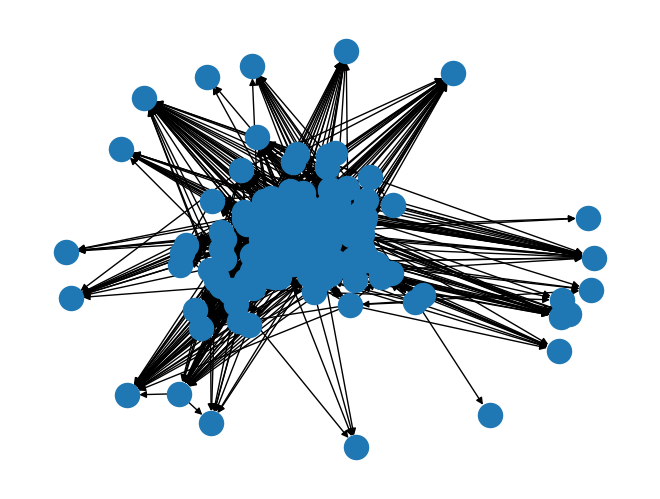

In [40]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

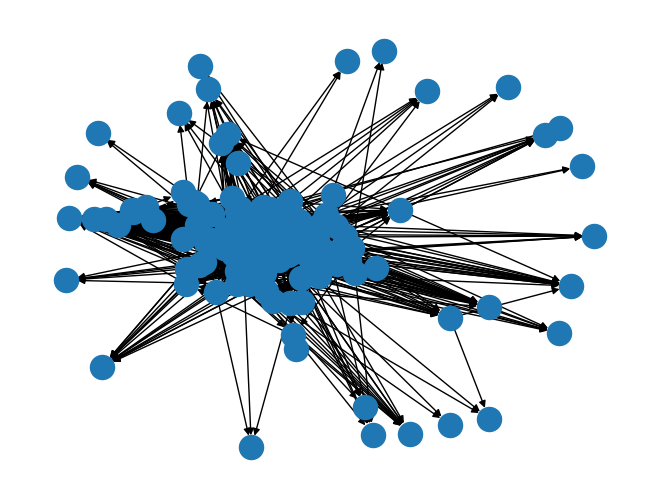

In [41]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

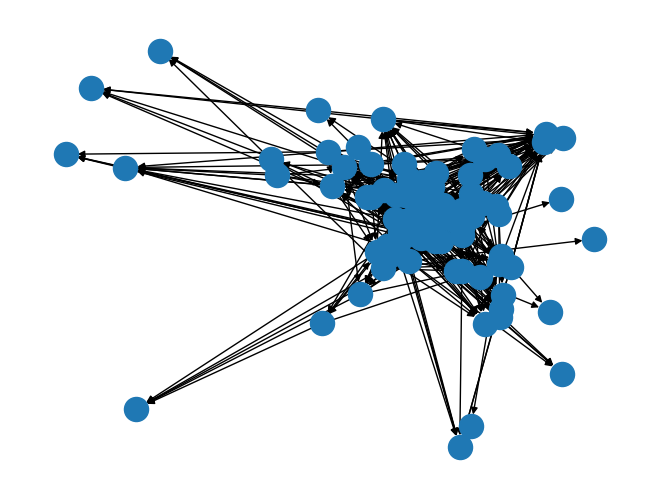

In [42]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)

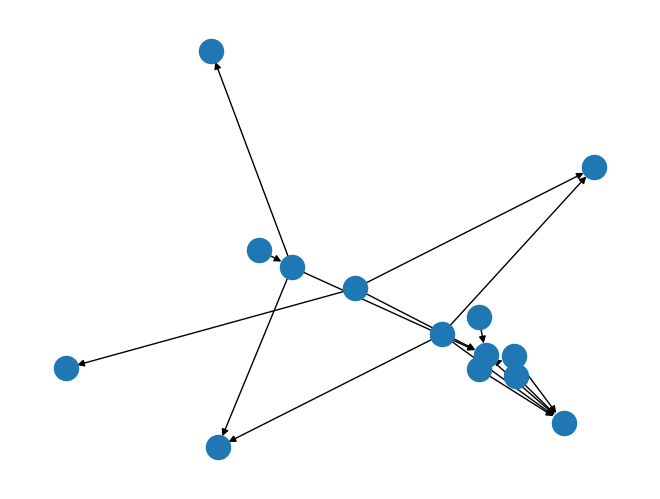

In [43]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[3])
graph_comm4 = grafo(communities[3], edges)
visualizza(graph_comm4)

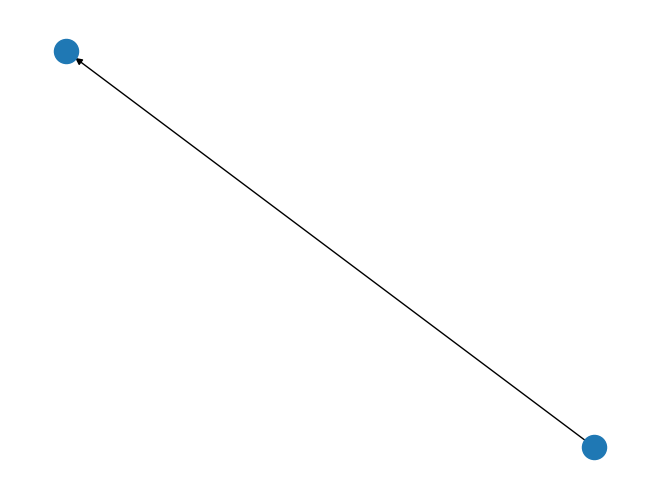

In [44]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[4])
graph_comm5 = grafo(communities[4], edges)
visualizza(graph_comm5)